該數據集包含了社交網絡中用戶的信息。這些信息涉及用戶ID，性別，年齡以及預估薪資。一家汽車公司剛剛推出了他們新型的豪華SUV，我們嘗試預測哪些用戶會購買這種全新SUV。並且在最後一列用來表示用戶是否購買。我們將建立一種模型來預測用戶是否購買這種SUV，該模型基於兩個變量，分別是年齡和預計薪資。因此我們的特徵矩陣將是這兩列。我們嘗試尋找用戶年齡與預估薪資之間的某種相關性，以及他是否購買SUV的決定。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datatset = pd.read_csv('./dataset/Social_Network_Ads.csv')
X = datatset.iloc[:,[2,3]].values
Y = datatset.iloc[:,4].values
datatset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
datatset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/letitgo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/letitgo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/letitgo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

/home/letitgo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
Y_pred = classifier.predict(X_test)

(300,)

# confusion_matrix 

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[65,  3],
       [ 8, 24]])

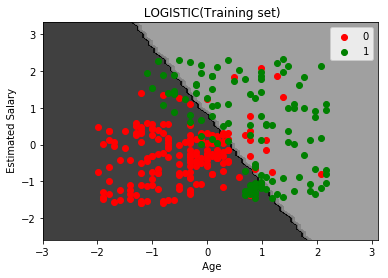

In [63]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train

# 計算他們的最小與最大值
start_X1 = X_set[:,0].min() - 1
stop_X1 = X_set[:,0].max() + 1

# 計算他們的最小與最大值
start_X2 = X_set[:,1].min() - 1
stop_X2 = X_set[:,1].max() + 1

# 設計他們的座標維度
X1, X2 = np.meshgrid(np.arange(start = start_X1, stop = stop_X1, step= 0.1),
                     np.arange(start = start_X2, stop = stop_X2, step= 0.1))

#規劃座標維度，並且把預測後的圖畫上去
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'gray')))

#把 data 標在圖上面
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)

plt. title(' LOGISTIC(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

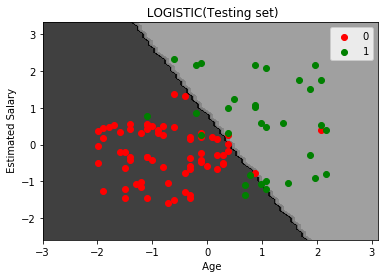

In [64]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test

# 計算他們的最小與最大值
start_X1 = X_set[:,0].min() - 1
stop_X1 = X_set[:,0].max() + 1

# 計算他們的最小與最大值
start_X2 = X_set[:,1].min() - 1
stop_X2 = X_set[:,1].max() + 1

# 設計他們的座標維度
X1, X2 = np.meshgrid(np.arange(start = start_X1, stop = stop_X1, step= 0.1),
                     np.arange(start = start_X2, stop = stop_X2, step= 0.1))

#規劃座標維度，並且把預測後的圖畫上去
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'gray')))

#把 data 標在圖上面
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)

plt. title(' LOGISTIC(Testing set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()